## A Visual History of Nobel Prize Winners



Explore a dataset from Kaggle containing a century's worth of Nobel Laureates. Who won? Who got snubbed? 

## Project Description

The Nobel Prize is perhaps the world's most well known scientific award. Every year it is given to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the prize was Eurocentric and male-focused, but nowadays it's not biased in any way. Surely, right? Well, let's find out! What characteristics do the prize winners have? Which country gets it most often? And has anybody gotten it twice? It's up to you to figure this out. The [dataset](https://www.kaggle.com/nobelfoundation/nobel-laureates) used in this project is from The Nobel Foundation on Kaggle. 

## Project Tasks

    1    The most Nobel of Prizes
    2    So, who gets the Nobel Prize?
    3    USA dominance
    4    USA dominance, visualized
    5    What is the gender of a typical Nobel Prize winner?
    6    The first woman to win the Nobel Prize
    7    Repeat laureates
    8    How old are you when you get the prize?
    9    Age differences between prize categories
    10    Oldest and youngest winners
    11    You get a prize!
    

## 1. The most Nobel of Prizes

The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?

Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


nobel = pd.read_csv('nobel.csv')
print(nobel.head())


print(nobel.info())

print(nobel.columns)

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

## 2. So, who gets the Nobel Prize?

Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented?

(For country, we will use the birth_country of the winner, as the organization_country is NaN for all shared Nobel Prizes.)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Switzerland                  16
Austria                      14
Norway                       12
China                        11
Denmark                      11
Australia                    10
Belgium                       9
South Africa                  9
Scotland                      9
Germany (Poland)              8
Name: birth_country, dtype: int64
Male      836
Female     49
Name: sex, dtype: int64


/home/jhu/.virtual_environments/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jhu/.virtual_environments/py39/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


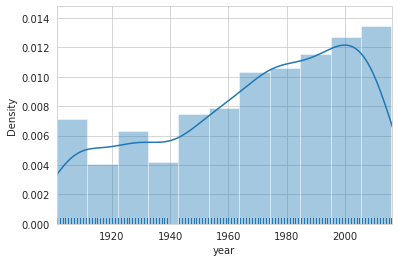

In [5]:
# Display the number of (possibly shared) Nobel Prizes handed

print(nobel['birth_country'].value_counts().head(20))

print(nobel['sex'].value_counts())


fig, ax = plt.subplots()

sns.distplot(nobel['year'], kde=True, rug=True, ax=ax)

ax.set(xlim=[nobel['year'].min(), nobel['year'].max()])
plt.show()

## 3. USA dominance

Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

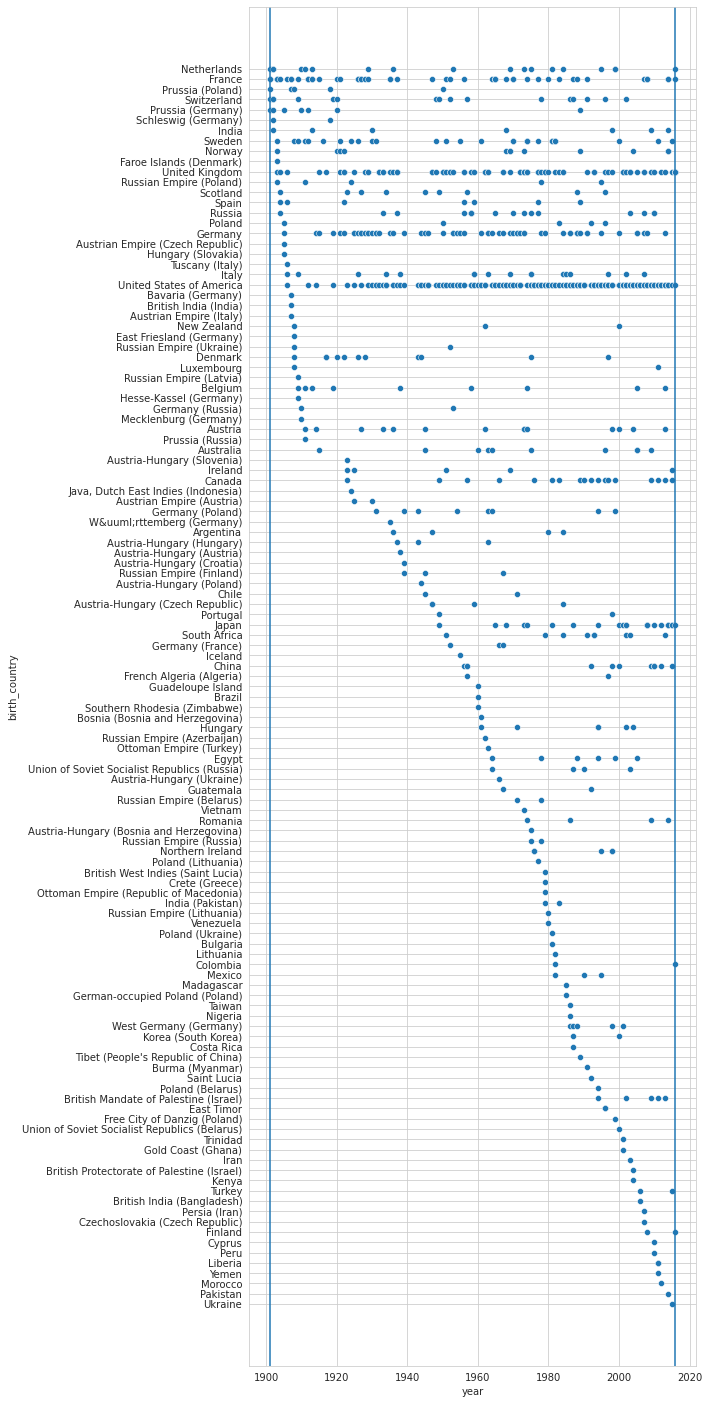

decade  USA                     
1910    United States of America     3
1920    United States of America     3
1930    United States of America    11
1940    United States of America     9
1950    United States of America    21
1960    United States of America    21
1970    United States of America    22
1980    United States of America    38
1990    United States of America    34
2000    United States of America    55
2010    United States of America    40
2020    United States of America     2
Name: USA, dtype: int64
   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motiva

In [9]:
sns.set_style('whitegrid')


fig, ax = plt.subplots(figsize=(8, 25))

sns.scatterplot(data=nobel, x='year', y='birth_country', ax=ax)

ax.axvline(x=1901)
ax.axvline(x=2016)

plt.show()



# Calculating the proportion of USA born winners per decade
nobel['decade'] = (round(nobel['year']/10)*10).astype(int)

nobel['USA'] = nobel[nobel['birth_country']=='United States of America']['birth_country'].copy()

print(nobel.groupby('decade')['USA'].value_counts())



nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America' #####################################

print(nobel.head())

## 4. USA dominance, visualized

A table is OK, but to see when the USA started to dominate the Nobel charts we need a plot!

     year  decade   category             full_name
604  1990    1990  Economics      Merton H. Miller
467  1976    1980   Medicine  D. Carleton Gajdusek
466  1976    1980   Medicine    Baruch S. Blumberg
462  1975    1980    Physics   Leo James Rainwater
174  1934    1930   Medicine   George Hoyt Whipple
709  2000    2000  Economics      James J. Heckman
817  2009    2010  Chemistry      Thomas A. Steitz
723  2001    2000  Economics     A. Michael Spence
627  1993    1990  Chemistry        Kary B. Mullis
278  1954    1950  Chemistry    Linus Carl Pauling


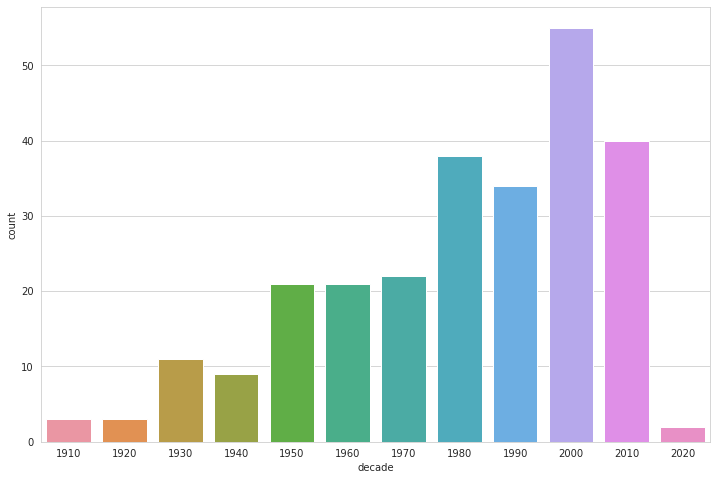

In [10]:
usaDF = nobel.loc[nobel['birth_country']=='United States of America', ['year', 'decade', 'category', 'full_name']]

print(usaDF.sample(10))

usaDF['decade'].astype(int)


fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(data=usaDF, x='decade', ax=ax)

plt.show()

## 5. What is the gender of a typical Nobel Prize winner?

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

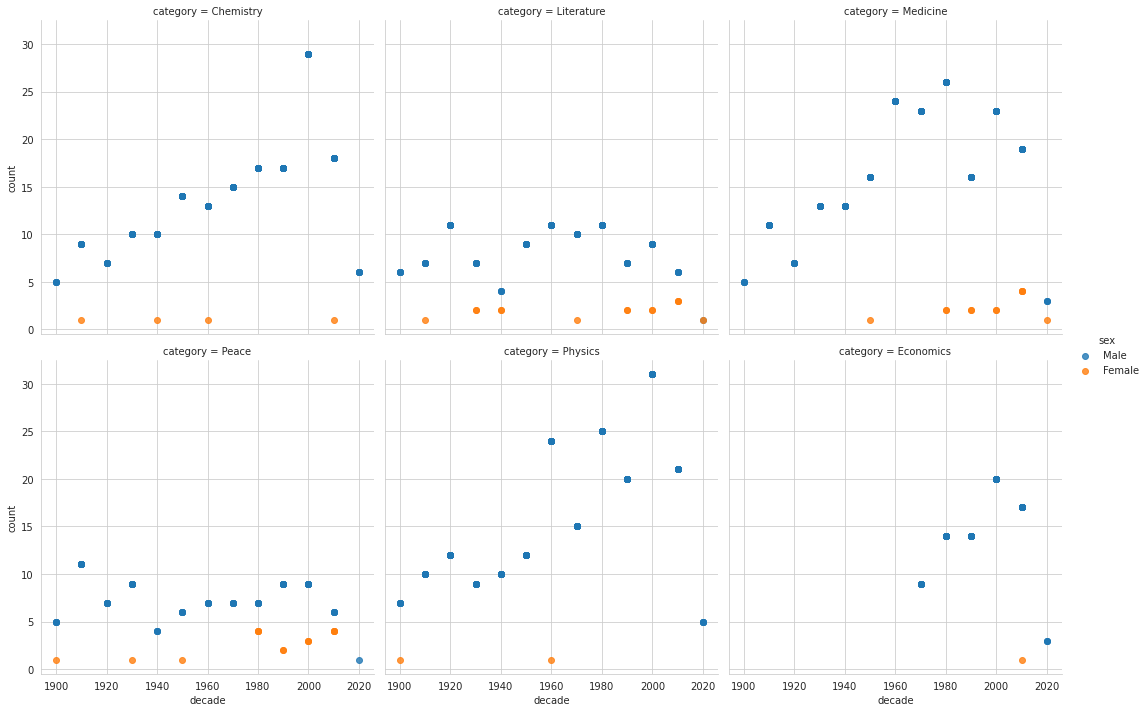

In [27]:
nobel['count'] = nobel.groupby(['decade', 'category', 'sex'])['birth_date'].transform('count')


sns.lmplot(data=nobel, x='decade', y='count', 
           hue='sex', fit_reg=False, 
           col='category', col_wrap=3)

plt.show()

## 6. The first woman to win the Nobel Prize

The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [32]:
# 1900 Peace: on above 4th plot


#####################################################################################################################
#####################################################################################################################
#####################################################################################################################

nobel[nobel['sex']=='Female'][['year', 'sex', 'full_name', 'category', 'birth_country']].nsmallest(1, 'year')

,year,sex,full_name,category,birth_country
19,1903,Female,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland)


## 7. Repeat laureates

For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)

In [39]:
nobel.groupby('full_name').agg(lambda x: len(x)>1)

nobel.groupby('full_name').apply(lambda x: len(x)>1)


#####################################################################################################################
# Knowing what to use, how to use and when to use


nobel.groupby('full_name').filter(lambda x: len(x)>1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,USA,usa_born_winner,count
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900,NaN,False,1.0
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910,NaN,False,1.0
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1920,NaN,False,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1940,NaN,False,NaN
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1950,United States of America,True,14.0
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1950,NaN,False,NaN
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,1960,United States of America,True,24.0
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,1960,NaN,False,13.0
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,1960,United States of America,True,7.0
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1960,NaN,False,NaN


## 8. How old are you when you get the prize?

The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.

But how old are you generally when you get the prize?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

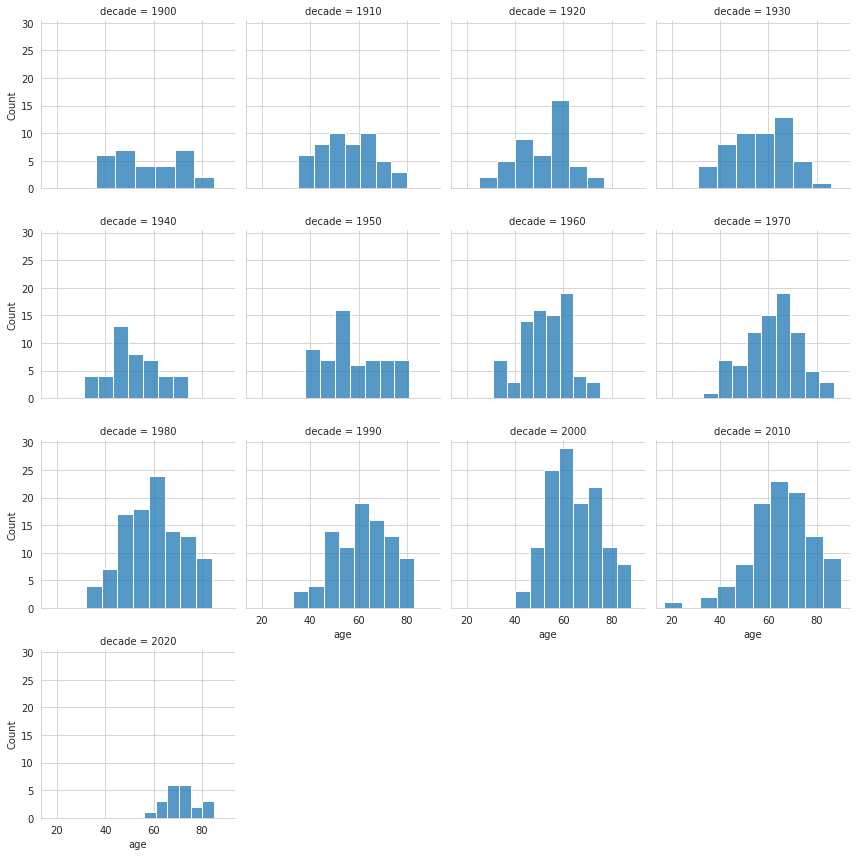

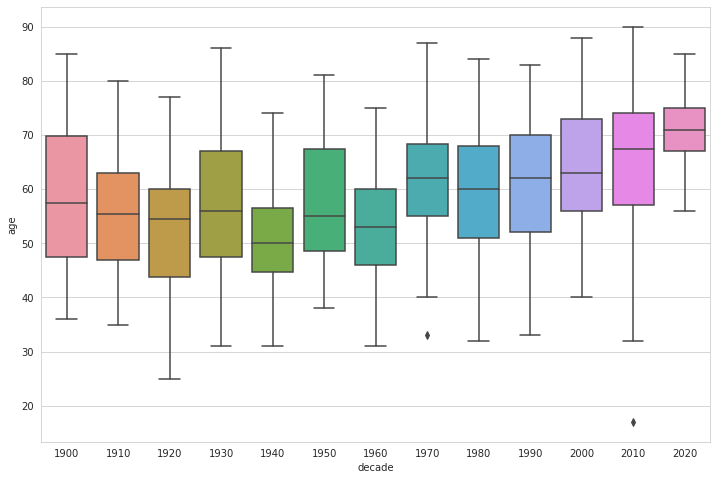

In [73]:
print(nobel.info())


#####################################################################################################################
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])


print(nobel.info())


#####################################################################################################################
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year


#nobel['age'].astype('int')


print(nobel.head())

#nobel['age'] = nobel[]





#####################################################################################################################

g = sns.FacetGrid(data=nobel, col='decade', col_wrap=4)

g.map(sns.histplot, 'age')
plt.show()
#####################################################################################################################



#fig, ax = plt.subplots(ncols=2, nrows=1, sharey=True)



#####################################################################################################################
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=nobel, y='age', x='decade', ax=ax)

plt.show()

## 9. Age differences between prize categories

The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.

We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945).

Let's look at age trends within different prize categories.

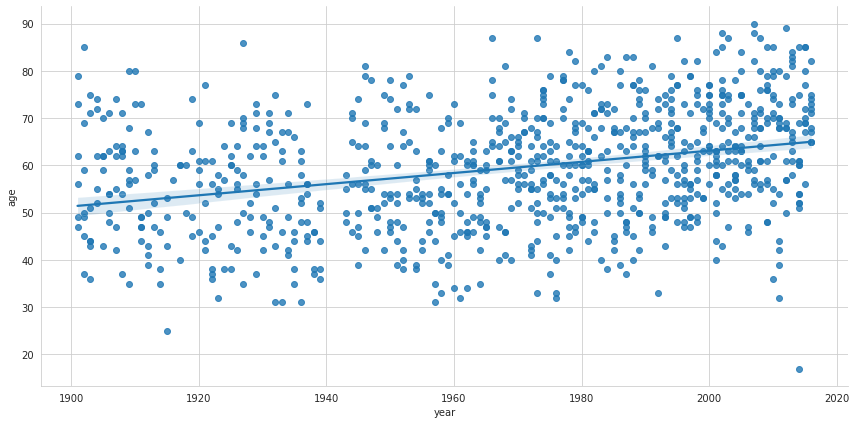

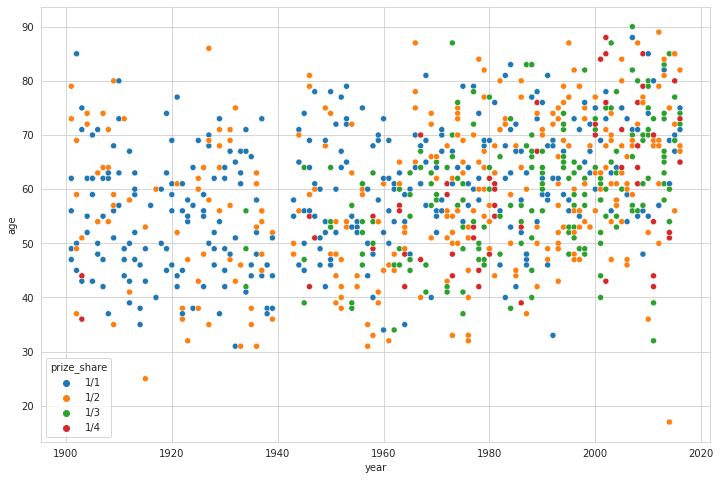

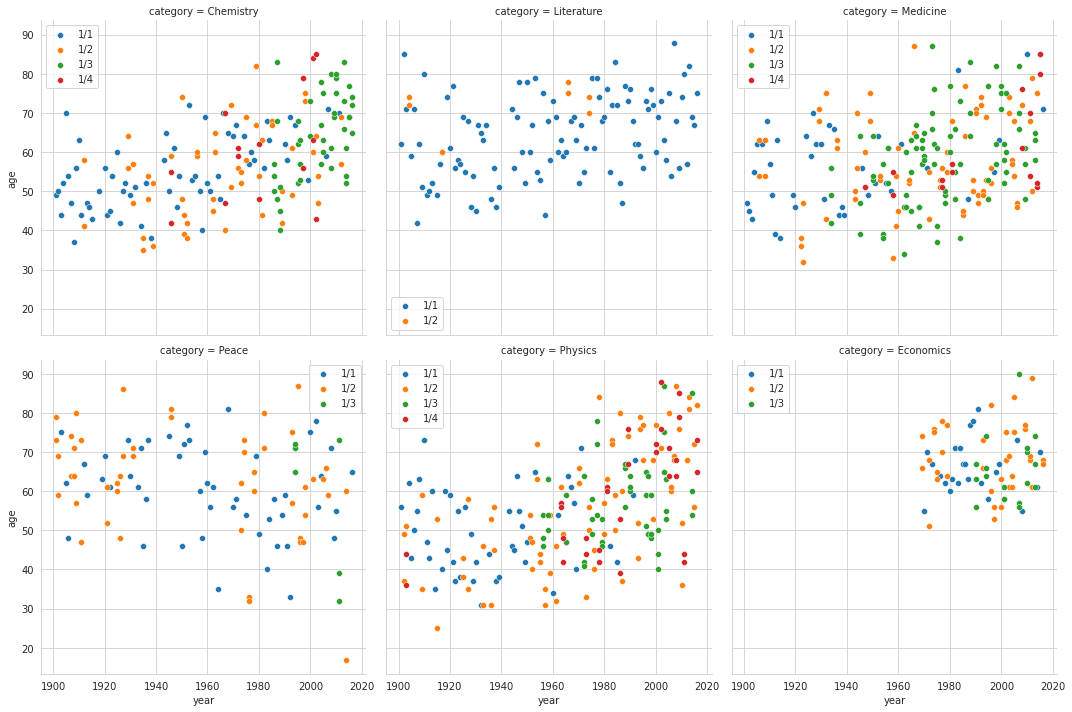

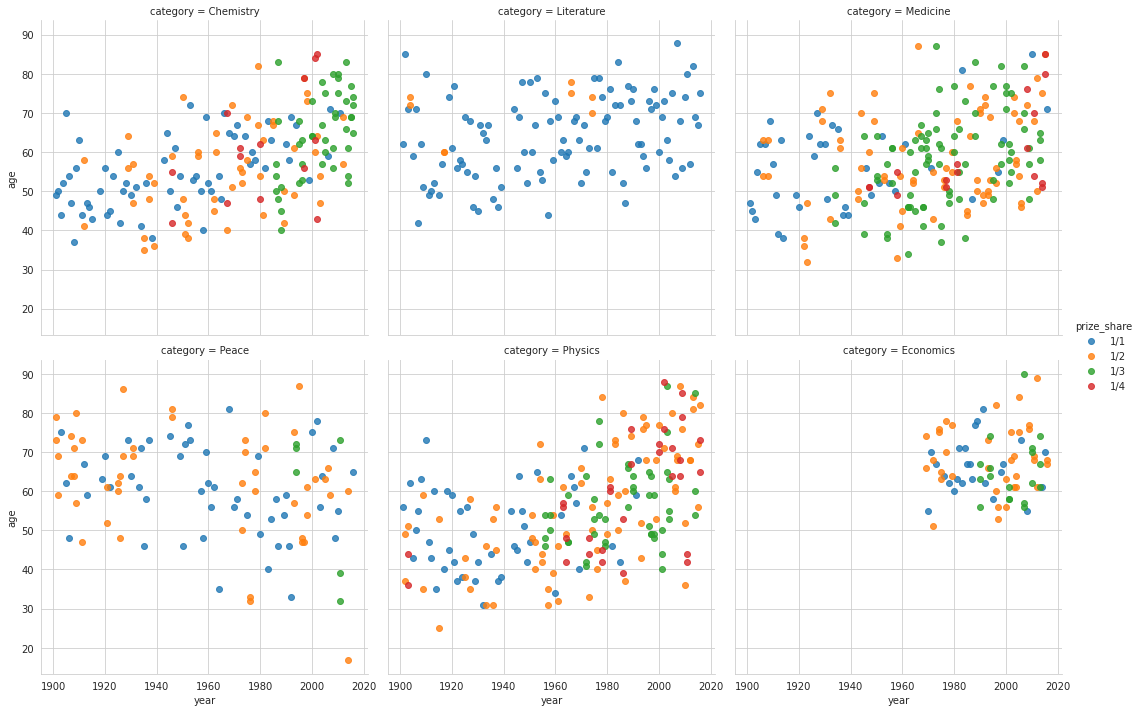

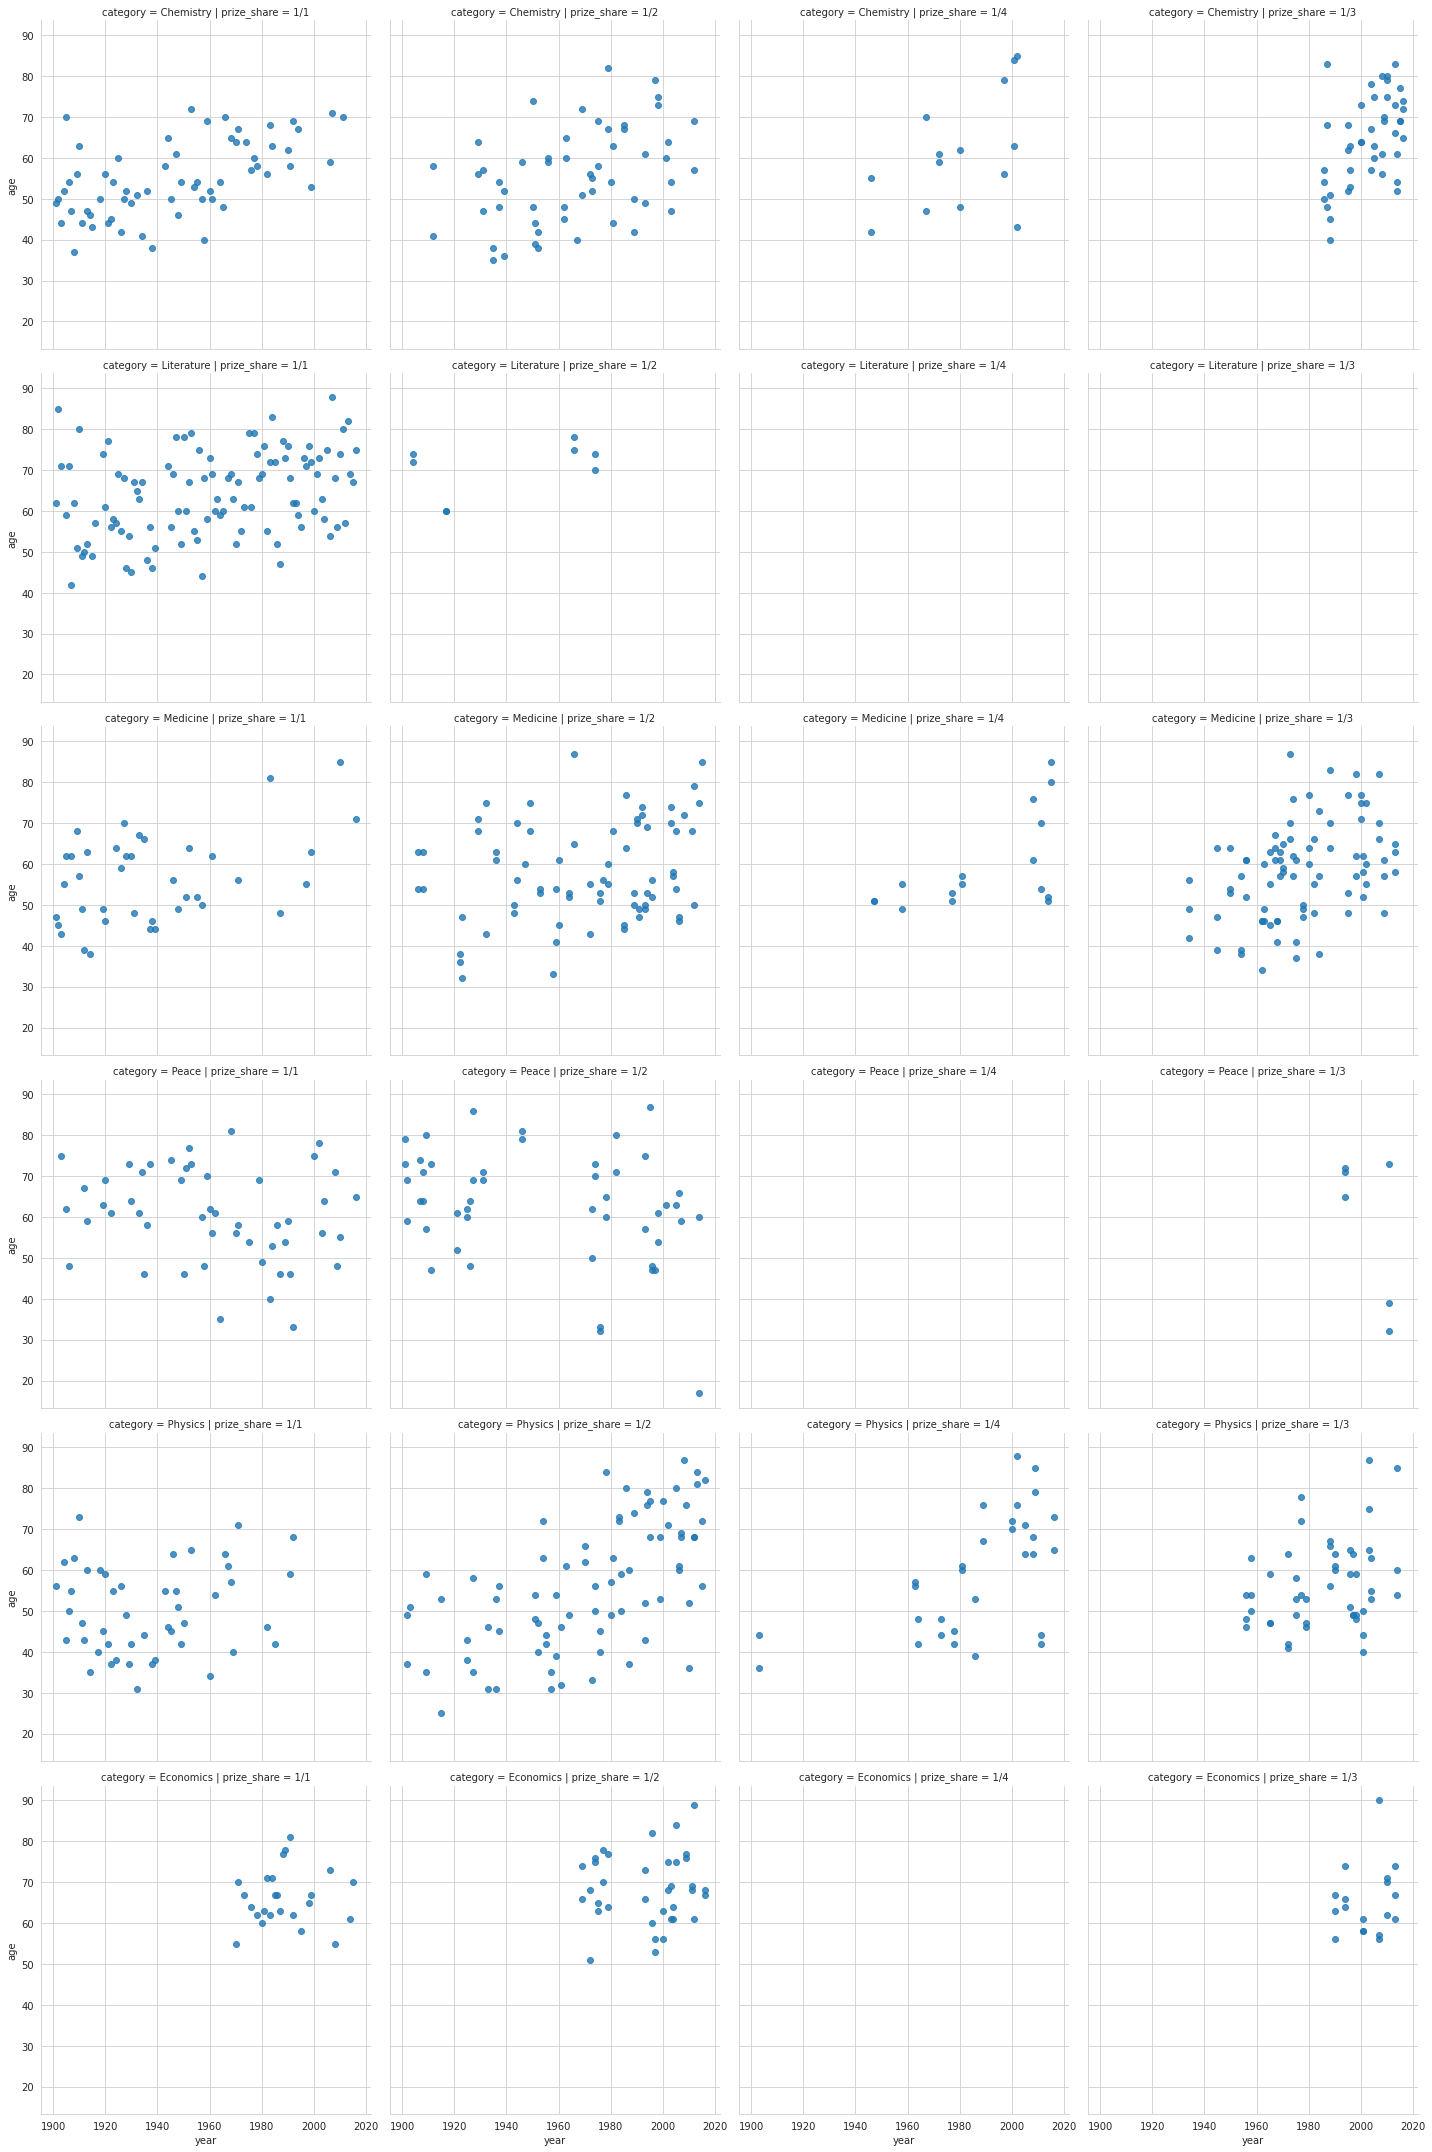

In [131]:

#fig, ax = plt.subplots(figsize=(12, 8))

sns.lmplot(data=nobel, x='year', y='age', height=6, aspect=2)

plt.show()




fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(data=nobel, x='year', y='age', hue='prize_share', hue_order=['1/1', '1/2', '1/3', '1/4'], ax=ax)
plt.show()




g = sns.FacetGrid(data=nobel, col='category', col_wrap=3, height=5, aspect=1,
                  hue='prize_share', hue_order=['1/1', '1/2', '1/3', '1/4'])

g.map(sns.scatterplot, 'year', 'age')

for ax in g.axes.ravel(): ###########################################################################################
    ax.legend()

plt.show()



sns.lmplot(data=nobel, x='year', y='age', fit_reg=False,
           col='category', col_wrap=3, hue='prize_share', hue_order=['1/1', '1/2', '1/3', '1/4'])
plt.show()




#####################################################################################################################

sns.lmplot(data=nobel, x='year', y='age', fit_reg=False,
           col='prize_share', row='category')
plt.show()

## 10. Oldest and youngest winners

# More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger!


# *******************************************************************************************************************
# Also how to read those valuable information and tell the story, or the data insight.  Think Think


In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?

In [134]:
print(nobel.nsmallest(1, 'age'))


#####################################################################################################################


print(nobel.nlargest(1, 'age'))

     year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

     laureate_id laureate_type         full_name birth_date birth_city  ...  \
885          914    Individual  Malala Yousafzai 1997-07-12    Mingora  ...   

    organization_city organization_country death_date death_city  \
885               NaN                  NaN        NaN        NaN   

    death_country decade  USA usa_born_winner  count   age  
885           NaN   2010  NaN           False    4.0  17.0  

[1 rows x 23 columns]
     year   category                                              prize  \
793  2007  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
793  "for having laid the foundations of mechanism ...         1/3   

     laureate_id laureate

## 11. You get a prize!

Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.

Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?


<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>